In [1]:
import tensorflow as tf
import numpy as np
import random
from tensorflow.keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Dense, Input, MaxPool2D, \
                                    BatchNormalization, GlobalAvgPool2D

In [2]:
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = load_data()
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [4]:
x_train, x_test = x_train.astype(np.float16)/255, x_test.astype(np.float16)/255

In [5]:
seq_model = tf.keras.Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPool2D(),
    BatchNormalization(),

    Conv2D(128, (3,3), activation='relu'),
    MaxPool2D(),
    BatchNormalization(),

    GlobalAvgPool2D(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [6]:
def functional_model():
    my_input = Input(shape=(28, 28, 1))
    x = Conv2D(32, (3,3), activation='relu')(my_input)
    x = Conv2D(64, (3,3), activation='relu')(x)
    x = MaxPool2D()(x)
    x = BatchNormalization()(x)

    x = Conv2D(128, (3,3), activation='relu')(x)
    x = MaxPool2D()(x)
    x = BatchNormalization()(x)

    x = GlobalAvgPool2D()(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(10, activation='softmax')(x)

    model = tf.keras.Model(inputs=my_input, outputs=x)

    return model

In [7]:
class MyCustomModel(tf.keras.Model):
    def __init__(self):
        super().__init__()
        # self.my_input = Input(shape=(28, 28, 1))
        self.conv1 = Conv2D(32, (3,3), activation='relu')
        self.conv2 = Conv2D(64, (3,3), activation='relu')
        self.max1 = MaxPool2D()
        self.bn1 = BatchNormalization()

        self.conv3 = Conv2D(128, (3,3), activation='relu')
        self.max2 = MaxPool2D()
        self.bn2 = BatchNormalization()

        self.glo = GlobalAvgPool2D()
        self.d1 = Dense(64, activation='relu')
        self.d2 = Dense(10, activation='softmax')
    
    def call(self, my_input):
        x = self.conv1(my_input)
        x = self.conv2(x)
        x = self.max1(x)
        x = self.bn1(x)
        x = self.conv3(x)
        x = self.max2(x)
        x = self.bn2(x)
        x = self.glo(x)
        x = self.d1(x)
        x = self.d2(x)

        return x

In [8]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [9]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((60000, 28, 28, 1), (60000,)), ((10000, 28, 28, 1), (10000,)))

In [10]:
# model = functional_model()
model = MyCustomModel()
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, batch_size=64, epochs=5)

Epoch 1/5
938/938 [==============================] - 8s 6ms/step - loss: 0.1975 - accuracy: 0.9450
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0504 - accuracy: 0.9846
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0349 - accuracy: 0.9893
Epoch 4/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0267 - accuracy: 0.9914
Epoch 5/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0207 - accuracy: 0.9937


In [12]:
model.evaluate(x_test, y_test, batch_size=64)

157/157 [==============================] - 1s 4ms/step - loss: 0.0409 - accuracy: 0.9876


[0.04090941324830055, 0.9876000285148621]

9


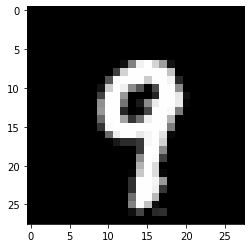

In [13]:
n = random.randint(0, 10000)
print(np.argmax(model.predict(np.expand_dims(x_test[n], axis=0))))
plt.imshow((x_test.reshape(10000, 28, 28)[n]*255).astype(np.int16), cmap='gray');